In [47]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as pl

In [48]:
n = 100
beta0 = 5
beta1 = 2
np.random.seed(1)
x = 10*ss.uniform.rvs(size=n)
y = beta0 + beta1*x + ss.norm.rvs(loc = 0, scale = 1, size  = n)#loc means mean = 0

14.80142786070299

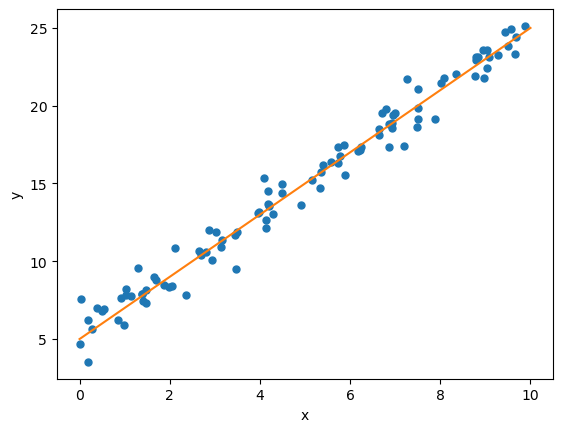

In [49]:
plt.figure()
plt.plot(x,y,"o",ms = 5)#marker size = ms
xx = np.array([0,10])
plt.plot(xx,beta0 + beta1*xx)
plt.xlabel("x")
plt.ylabel("y")
x.mean()
y.mean()

In [50]:
def compute_rss(y_estimate, y):
  return sum(np.power(y-y_estimate, 2))
def estimate_y(x, b_0, b_1):
  return b_0 + b_1 * x
rss = compute_rss(estimate_y(x, beta0, beta1), y)
rss

81.540007425512

In [51]:
rss = []
slopes = np.arange(-10,15,0.01) #np.arange() function generates values up to, but not including, the end value.
for slope in slopes:
    rss.append(np.sum((y - beta0 - slope*x)**2))

In [52]:
len(rss)

2500

In [53]:
ind_min= np.argmin(rss)

In [54]:
ind_min # lowest rss value of rss happend at location(index) 1200

1200

In [55]:
print("estimate for the slope: ", slopes[ind_min])

estimate for the slope:  1.9999999999997442


Text(0, 0.5, 'RSS')

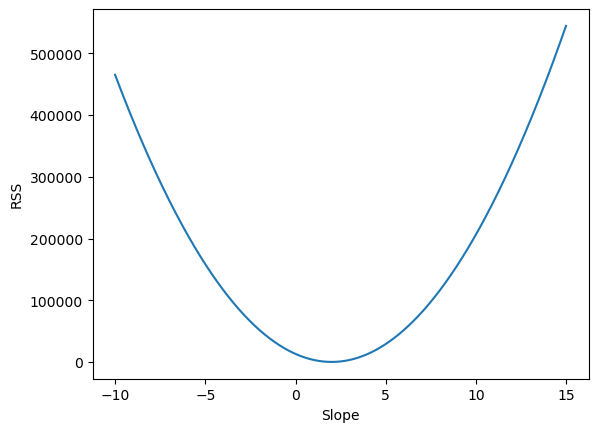

In [56]:
#plot figure
plt.figure()
plt.plot(slopes, rss)
plt.xlabel("Slope")
plt.ylabel("RSS")

In [61]:
import statsmodels.api as sm

In [62]:
mod = sm.OLS(y,x)
est = mod.fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              2974.
Date:                Mon, 13 Nov 2023   Prob (F-statistic):                    1.14e-75
Time:                        19:59:28   Log-Likelihood:                         -246.89
No. Observations:                 100   AIC:                                      495.8
Df Residuals:                      99   BIC:                                      498.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [65]:
X = sm.add_constant(x)
mod = sm.OLS(y,X)
est = mod.fit()
print(est.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     4115.
Date:                Mon, 13 Nov 2023   Prob (F-statistic):           7.47e-82
Time:                        19:59:39   Log-Likelihood:                -130.72
No. Observations:                 100   AIC:                             265.4
Df Residuals:                      98   BIC:                             270.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2370      0.174     30.041      0.0

## Q1) If the true intercept were negative but the regression model did not include an intercept term, what would that imply for the estimated slope?
#### The estimated slope would likely be lower than the true slope.


## Q2) What does an estimated intercept term correspond to?
#### The estimated outcome when the input is set to zero

## Q3)What does an estimated slope term correspond to?
#### The change in the estimated output when the input changes by one unit

## Q4)You could create several datasets using different seed values and estimate the slope from each. These parameters will follow some distribution.
## What is the name used for this distribution?

#### The sampling distribution of the parameter estimates

In [67]:
n = 500
beta0 = 5
beta1 = 2
beta2 = -1
np.random.seed(1)
x1 = 10*ss.uniform.rvs(size = n)
x2 = 10*ss.uniform.rvs(size = n)# rvs is random variables
y = beta0 + beta1*x1 + beta2*x2 + ss.norm.rvs(loc = 0, scale = 1, size = n)
# scale mean both std deviation and variance is 1

In [68]:
X = np.stack([x1,x2], axis = 1)

Text(0.5, 0, 'y')

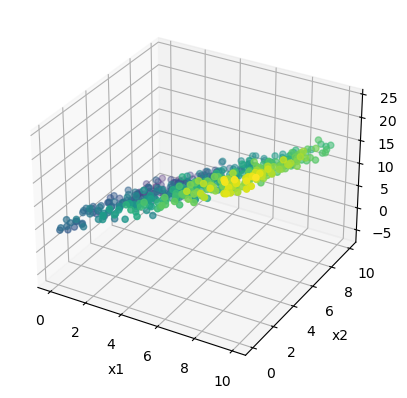

In [70]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0], X[:,1], y, c = y)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")

In [78]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(copy_X = True, fit_intercept = True, n_jobs = 1)
lm.fit(X,y)
lm.intercept_

5.154077763777245

In [79]:
lm.coef_[0]

1.9999378989891412

In [81]:
lm.coef_[1]

-1.0202644869933355

In [82]:
X_0 = np.array([2,4])
lm.predict(X_0)

ValueError: Expected 2D array, got 1D array instead:
array=[2 4].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [83]:
lm.predict(X_0.reshape(1,-1))

array([5.07289561])

In [84]:
lm.score(X,y)

0.9798997316600129

In [86]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,train_size = 0.5, random_state=1)
lm = LinearRegression()
lm.fit(xtrain,ytrain)

LinearRegression()

In [87]:
lm.score(xtest,ytest)

0.9794930834681773

### Q1) When evaluating the performance of a model in a regression setting on test data, which measure is most appropriate?
#### Test MSE
#### Test error rate

### Q2) How do we expect an model that was overfit on the training data to perform on testing data?
#### It will likely perform worse on the testing data.

### Q3) What is the primary motivation for splitting our model into training and testing data?
#### By evaluating how our model fits on unseen data, we can see how generalizable it is.
